<a href="https://colab.research.google.com/github/pragatheesha/house_price_prediction/blob/main/house_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Load the dataset

import pandas as pd

df=pd.read_csv('/content/house_prices.csv')
df

,Property_ID,Area,Bedrooms,Bathrooms,Age,Location,Property_Type,Price
0,PROP0001,3712,4,3,36,Rural,House,22260000
1,PROP0002,1591,4,1,35,Suburb,House,16057500
2,PROP0003,1646,4,3,20,Rural,Villa,12730000
3,PROP0004,4814,1,2,13,City Center,Villa,50840000
4,PROP0005,800,4,2,38,Suburb,Apartment,10650000
...,...,...,...,...,...,...,...,...
295,PROP0296,1450,4,1,0,Suburb,Villa,17625000
296,PROP0297,3866,1,2,16,City Center,Apartment,41060000
297,PROP0298,1970,3,1,6,Rural,Apartment,13050000
298,PROP0299,4243,3,2,7,Rural,Villa,24865000


In [ ]:
#understand the dataset

df.head()

,Property_ID,Area,Bedrooms,Bathrooms,Age,Location,Property_Type,Price
0,PROP0001,3712,4,3,36,Rural,House,22260000
1,PROP0002,1591,4,1,35,Suburb,House,16057500
2,PROP0003,1646,4,3,20,Rural,Villa,12730000
3,PROP0004,4814,1,2,13,City Center,Villa,50840000
4,PROP0005,800,4,2,38,Suburb,Apartment,10650000


In [ ]:
# Check structures

df.dtypes

,0
Property_ID,object
Area,int64
Bedrooms,int64
Bathrooms,int64
Age,int64
Location,object
Property_Type,object
Price,int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Property_ID    300 non-null    object
 1   Area           300 non-null    int64 
 2   Bedrooms       300 non-null    int64 
 3   Bathrooms      300 non-null    int64 
 4   Age            300 non-null    int64 
 5   Location       300 non-null    object
 6   Property_Type  300 non-null    object
 7   Price          300 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 18.9+ KB


In [ ]:
df.describe()

,Area,Bedrooms,Bathrooms,Age,Price
count,300.00000,300.000000,300.000000,300.000000,3.000000e+02
mean,2759.70000,3.033333,2.026667,25.000000,2.488366e+07
std,1297.68143,1.467219,0.792495,14.332646,1.266525e+07
min,520.00000,1.000000,1.000000,0.000000,3.695000e+06
25%,1675.75000,2.000000,1.000000,12.000000,1.527750e+07
50%,2738.00000,3.000000,2.000000,25.500000,2.236500e+07
75%,3801.25000,4.000000,3.000000,36.250000,3.460812e+07
max,4999.00000,5.000000,3.000000,49.000000,5.870000e+07


In [ ]:
# Data cleaning

df.isna().sum()
df.fillna(df.median(numeric_only=True), inplace=True)
df.isnull().sum()

,0
Property_ID,0
Area,0
Bedrooms,0
Bathrooms,0
Age,0
Location,0
Property_Type,0
Price,0


In [ ]:
# Encode Categorical Variables

df = pd.get_dummies(df, columns=["Location"], drop_first=True)
df

,Property_ID,Area,Bedrooms,Bathrooms,Age,Property_Type,Price,Location_Rural,Location_Suburb
0,PROP0001,3712,4,3,36,House,22260000,True,False
1,PROP0002,1591,4,1,35,House,16057500,False,True
2,PROP0003,1646,4,3,20,Villa,12730000,True,False
3,PROP0004,4814,1,2,13,Villa,50840000,False,False
4,PROP0005,800,4,2,38,Apartment,10650000,False,True
...,...,...,...,...,...,...,...,...,...
295,PROP0296,1450,4,1,0,Villa,17625000,False,True
296,PROP0297,3866,1,2,16,Apartment,41060000,False,False
297,PROP0298,1970,3,1,6,Apartment,13050000,True,False
298,PROP0299,4243,3,2,7,Villa,24865000,True,False


In [ ]:
# Feature selection

X = df.drop("Price", axis=1)
y = df["Price"]

In [ ]:
df

,Property_ID,Area,Bedrooms,Bathrooms,Age,Property_Type,Price,Location_Rural,Location_Suburb
0,PROP0001,3712,4,3,36,House,22260000,True,False
1,PROP0002,1591,4,1,35,House,16057500,False,True
2,PROP0003,1646,4,3,20,Villa,12730000,True,False
3,PROP0004,4814,1,2,13,Villa,50840000,False,False
4,PROP0005,800,4,2,38,Apartment,10650000,False,True
...,...,...,...,...,...,...,...,...,...
295,PROP0296,1450,4,1,0,Villa,17625000,False,True
296,PROP0297,3866,1,2,16,Apartment,41060000,False,False
297,PROP0298,1970,3,1,6,Apartment,13050000,True,False
298,PROP0299,4243,3,2,7,Villa,24865000,True,False


In [ ]:
# Train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Drop Property_ID column as it's a unique identifier and not a numerical feature
X_train = X_train.drop("Property_ID", axis=1)
X_test = X_test.drop("Property_ID", axis=1)

# Apply one-hot encoding to the 'Property_Type' column for both training and testing sets
# Use get_dummies to convert categorical features into dummy/indicator variables
X_train = pd.get_dummies(X_train, columns=['Property_Type'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['Property_Type'], drop_first=True)

# Train linear regression model

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make prediction

predictions = model.predict(X_test)

In [ ]:
# model Evaluation

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("Mean Absolute Error:", mae)
print("Mean Square Error:", mse)
print("Root Mean Square Error:", rmse)
print("R2 Score:", r2)

Mean Absolute Error: 2188736.343703811
Mean Square Error: 8454330868276.596
Root Mean Square Error: 2907633.2073142575
R2 Score: 0.9406371185112241


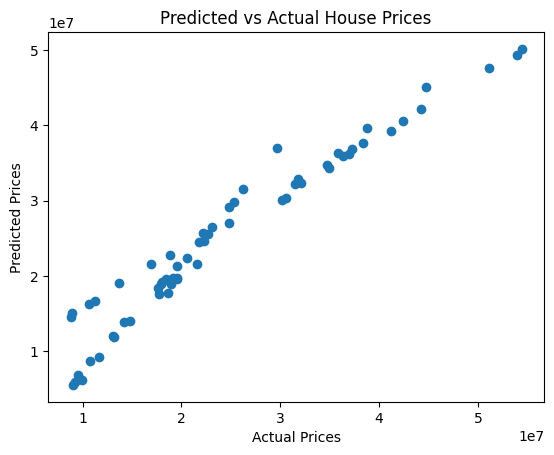

In [ ]:
# Prediction vs Actual visualization

import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual House Prices")
plt.savefig("predictions_vs_actual.png")
plt.show()

In [ ]:
# Feature Importance

feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

feature_importance

,Feature,Coefficient
1,Area,1.585709e+06
2,Bedrooms,4.545940e+05
7,Location_Suburb,6.372497e+04
0,Property_ID,7.558956e+03
3,Bathrooms,-8.244368e+04
6,Location_Rural,-6.079037e+05
5,Property_Type,-8.633012e+06
4,Age,-1.672813e+07


In [ ]:
report = f"""
HOUSE PRICE PREDICTION MODEL

Mean Absolute Error (MAE): {mae:,.0f}
Root Mean Squared Error (RMSE): {rmse:,.0f}
R2 Score: {r2:.2f}

Best Features:
- Area
- Location
- Property Type

Conclusion:
The linear regression model explains approximately {r2*100:.1f}% of the variance
in house prices and performs well for a beginner machine learning project.
"""

with open("model_evaluation_report.md", "w") as f:
    f.write(report)

print("Model evaluation report saved successfully.")


Model evaluation report saved successfully.
